# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [20]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 9

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [21]:
def relu(x):
  return torch.clamp(x,min =0)

def sigmoid(x):
  return 1/(1+torch.exp(-x))

In [22]:
def forward(x):
  z1 = torch.matmul(x,w1) + b1
  a1 = relu(z1)

  z2 = torch.matmul(a1,w2) + b2
  a2 = relu(z2)

  z3 = torch.matmul(a2,w3) + b3
  a3 = relu(z3)

  z4 = torch.matmul(a3,w4) + b4
  y_hat = sigmoid(z4)

  return y_hat

In [23]:
def binary_cross_entropy(y_true, y_pred):
  eps = 1e-7
  return -(y_true*torch.log(y_pred+eps)+(1-y_true)*torch.log(1-y_pred + eps)).mean()

In [24]:
def accuracy(y_true,y_pred):
  preds = (y_pred >0.5).float()
  return (preds == y_true).float().mean()

In [25]:
# ==============================================================================
from sklearn.model_selection import train_test_split


w1 = torch.randn(2, 16, requires_grad=True)
b1 = torch.randn(16, requires_grad=True)

w2 = torch.randn(16, 16, requires_grad=True)
b2 = torch.randn(16, requires_grad=True)

w3 = torch.randn(16, 16, requires_grad=True)
b3 = torch.randn(16, requires_grad=True)

w4 = torch.randn(16, 1, requires_grad=True)
b4 = torch.randn(1, requires_grad=True)

training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

x_full = (X_full - X_full.mean(0)) / X_full.std(0)
#Earlier without normalisation and epochs = 1000, i was getting an accurcy of about 79%,then when i normalised the data and decreased the learning rate and
#increased the epochs to 3000, i got an accuracy of about 85%

X_train,X_test,y_train,y_test = train_test_split(X_full,y_full,test_size = 0.3,random_state = 42,shuffle = True)

X_train = X_train.clone().detach().float().requires_grad_(True)
X_test  = X_test.clone().detach().float().requires_grad_(True)

y_train = y_train.clone().detach().float().requires_grad_(True)
y_test  = y_test.clone().detach().float().requires_grad_(True)

lr = 0.005

for epoch in range(3000):

  y_hat = forward(X_train)
  loss = binary_cross_entropy(y_train,y_hat)

  training_loss.append(loss.item())

  train_acc = accuracy(y_train, y_hat)
  training_acc.append(train_acc.item())

  loss.backward()

  with torch.no_grad():
    w1 -= lr * w1.grad
    b1 -= lr * b1.grad

    w2 -= lr * w2.grad
    b2 -= lr * b2.grad

    w3 -= lr * w3.grad
    b3 -= lr * b3.grad

    w4 -= lr * w4.grad
    b4 -= lr * b4.grad


  for p in [w1,b1,w2,b2,w3,b3,w4,b4]:
    p.grad.zero_()

  with torch.no_grad():
    y_hat_test = forward(X_test)

    test_loss = binary_cross_entropy(y_test,y_hat_test)
    validation_loss.append(test_loss.item())

    val_acc = accuracy(y_test, y_hat_test)
    validation_acc.append(val_acc.item())

  if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | "f"Train Loss: {loss.item():.4f} | "f"Val Loss: {test_loss.item():.4f}")
# ==============================================================================

Epoch    0 | Train Loss: 9.7562 | Val Loss: 9.3985
Epoch  100 | Train Loss: 6.5740 | Val Loss: 6.1152
Epoch  200 | Train Loss: 5.8681 | Val Loss: 5.3561
Epoch  300 | Train Loss: 3.7178 | Val Loss: 3.4315
Epoch  400 | Train Loss: 1.0328 | Val Loss: 1.1044
Epoch  500 | Train Loss: 0.8332 | Val Loss: 0.9342
Epoch  600 | Train Loss: 0.7334 | Val Loss: 0.8612
Epoch  700 | Train Loss: 0.6581 | Val Loss: 0.7581
Epoch  800 | Train Loss: 0.6076 | Val Loss: 0.6905
Epoch  900 | Train Loss: 0.5697 | Val Loss: 0.6386
Epoch 1000 | Train Loss: 0.5412 | Val Loss: 0.5999
Epoch 1100 | Train Loss: 0.5001 | Val Loss: 0.5405
Epoch 1200 | Train Loss: 0.4854 | Val Loss: 0.5300
Epoch 1300 | Train Loss: 0.4749 | Val Loss: 0.5202
Epoch 1400 | Train Loss: 0.4640 | Val Loss: 0.5078
Epoch 1500 | Train Loss: 0.4544 | Val Loss: 0.4975
Epoch 1600 | Train Loss: 0.4461 | Val Loss: 0.4894
Epoch 1700 | Train Loss: 0.4387 | Val Loss: 0.4815
Epoch 1800 | Train Loss: 0.4317 | Val Loss: 0.4741
Epoch 1900 | Train Loss: 0.4247

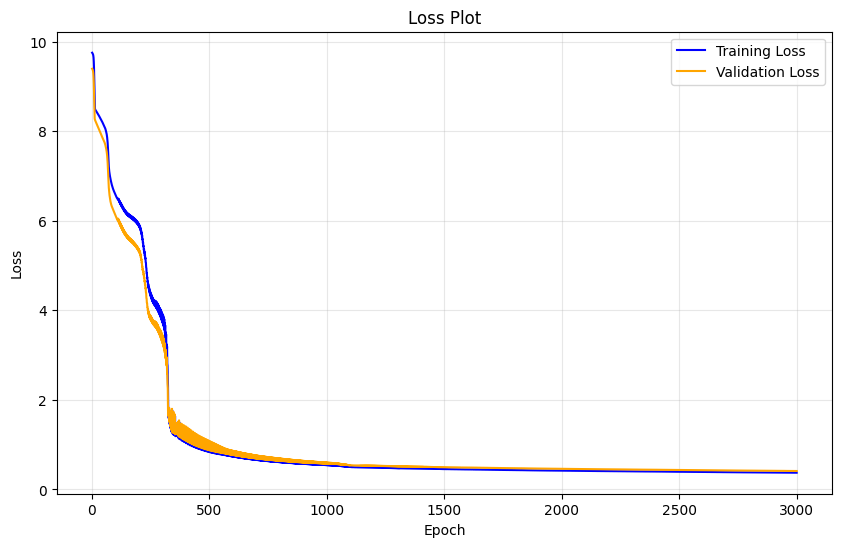

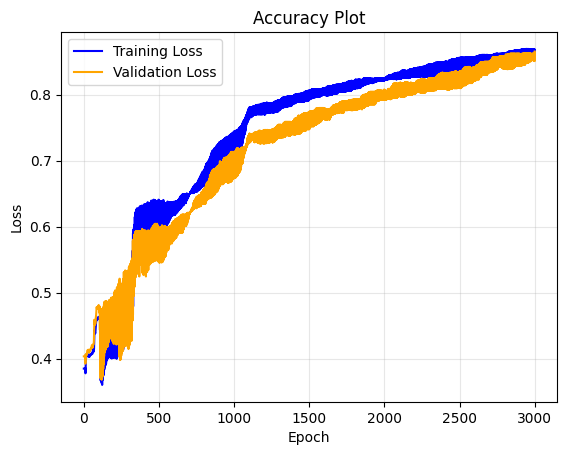

Final Training Accuracy   : 85.57%
Final Validation Accuracy : 86.56%


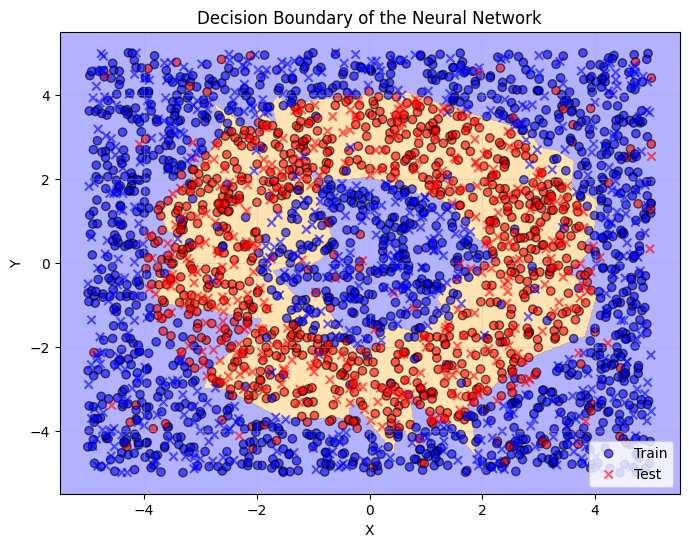

In [26]:
#GDC Dasboard
import matplotlib.pyplot as plt
#1. System Error Trajectory

epochs = range(1,3001)
plt.figure(figsize=(10, 6))
plt.plot(epochs,training_loss,color='blue',label='Training Loss')
plt.plot(epochs,validation_loss,color='orange',label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)
plt.legend()
plt.title("Loss Plot")
plt.show()

#2. Integrity Check
final_train_acc = training_acc[-1]
final_val_acc   = validation_acc[-1]

plt.plot(epochs,training_acc,color='blue',label='Training Loss')
plt.plot(epochs,validation_acc,color='orange',label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)
plt.title("Accuracy Plot")
plt.legend()
plt.show()

print(f"Final Training Accuracy   : {final_train_acc*100:.2f}%")
print(f"Final Validation Accuracy : {final_val_acc*100:.2f}%")

#3. Geospatial Threat Map (Decision Boundary)

x_min, x_max = X_full[:,0].min()-0.5, X_full[:,0].max()+0.5
y_min, y_max = X_full[:,1].min()-0.5, X_full[:,1].max()+0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32, requires_grad=False)

with torch.no_grad():
    y_grid = forward(grid_tensor)
    y_grid_np = y_grid.detach().cpu().numpy().reshape(xx.shape)

plt.figure(figsize=(8,6))

# Contour plot for the boundary
plt.contourf(xx, yy, y_grid_np, levels=[0,0.5,1], alpha=0.3, colors=['blue','orange'])

# Overlay actual points
plt.scatter(X_train[:,0].detach().numpy(), X_train[:,1].detach().numpy(), c=y_train[:,0].detach().numpy(), cmap='bwr', edgecolor='k', alpha=0.6, label='Train')
plt.scatter(X_test[:,0].detach().numpy(), X_test[:,1].detach().numpy(), c=y_test[:,0].detach().numpy(), cmap='bwr', marker='x', alpha=0.6, label='Test')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision Boundary of the Neural Network")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

